# Tweet Analysis and Engagement Rate Analysis

<span style='font-family:Times New Roman'> <span style='background :yellow' > <span style='color:Blue'> This notebook will walk you through some basic social media analytics techniques. You should have already watched the **'Tweet Extraction and Sentiment Analysis'** and ***'Natural Language Processing with Tweets' Tutorials***.  </span>  </span> </span>

If you need a refresher on what attributes are included in the Tweet Object you can reference the [Twitter Developer Documentation](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/introduction). 

In this tutorial we will cover:
1. Importing CSV files
2. Appending CSV files
3. Dataframes 
4. Appending Dataframes
5. Merging to dataframes
6. Descriptive statistics tables
7. Exporting summary stats files
8. Exporting data to csv files and excel files


In [29]:
#begin by importing all of the relevant packages we will need
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import keys


from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#read in the data 
Data=pd.read_csv('booster4_tweets.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jocamach/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jocamach/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
data.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites
0,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,0,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN
1,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,2,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN
2,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,0,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN
3,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN
4,1440754267002847237,Wed Sep 22 19:05:59 +0000 2021,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",Pfizer COVID-19 boosters: What you need to kno...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 56050543, 'id_str': '56050543', 'name':...",44941,39794,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",NaN,"Boston, MA",NaN


In [31]:
data.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites
464,1437676484957663237,Tue Sep 14 07:15:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Vaccine booster doses not 'appropriate' right ...,Vaccine booster doses 'appropriate right Scien...,"Sentiment(polarity=0.37857142857142856, subjec...",0.378571,0.528571,en,0,0,"{'id': 1139147630544506882, 'id_str': '1139147...",277,300,Vaccine,NaN,"Dubai Marina, Dubai",NaN
465,1437666415511752710,Tue Sep 14 06:35:58 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, Manchester, Leeds & Birmingham",NaN
466,1437666412449964036,Tue Sep 14 06:35:57 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, England",NaN
467,1437658839869005826,Tue Sep 14 06:05:52 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, Manchester, Leeds & Birmingham",NaN
468,1437658836505178123,Tue Sep 14 06:05:51 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, England",NaN


In [32]:
#descriptive statistics 
sumstats=data.describe()
#the pandas round function rounds to one decimal place. You can specifiy the number of decimal places inside the pararentheses
sumstats.round()

,id,polarity,subjectivity,favorite_count,retweet_count,followers,friends
count,4.690000e+02,469.0,469.0,469.0,469.0,469.0,469.0
mean,1.439072e+18,0.0,0.0,2.0,13.0,25636.0,2206.0
std,7.591615e+14,0.0,0.0,10.0,19.0,264180.0,6559.0
min,1.437659e+18,-1.0,0.0,0.0,0.0,0.0,0.0
25%,1.438536e+18,0.0,0.0,0.0,0.0,188.0,226.0
50%,1.438956e+18,0.0,0.0,0.0,4.0,867.0,624.0
75%,1.439579e+18,0.0,0.0,0.0,14.0,3247.0,1765.0
max,1.440804e+18,1.0,1.0,159.0,57.0,4013606.0,100266.0


In [36]:
#calculate impressions
impressions = data["favorite_count"] + data["retweet_count"]
data["impressions"] = impressions #creating new column 

In [37]:
data.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,impressions
0,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,0,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN,0
1,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,2,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN,2
2,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,0,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN,0
3,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN,1
4,1440754267002847237,Wed Sep 22 19:05:59 +0000 2021,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",Pfizer COVID-19 boosters: What you need to kno...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 56050543, 'id_str': '56050543', 'name':...",44941,39794,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",NaN,"Boston, MA",NaN,1


In [38]:
#calculate reach
reach = data["followers"] + data["friends"] #reach what you are saving the column as 
data["reach"] = reach #Create new column for followers and friends 

In [39]:
data.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,impressions,reach
0,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,0,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN,0,8535
1,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,2,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN,2,14555
2,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,0,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN,0,8502
3,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN,1,1036
4,1440754267002847237,Wed Sep 22 19:05:59 +0000 2021,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",Pfizer COVID-19 boosters: What you need to kno...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 56050543, 'id_str': '56050543', 'name':...",44941,39794,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",NaN,"Boston, MA",NaN,1,84735


In [40]:
#calculate engagement metric
engagement = data["impressions"] / data["reach"]
data["engagement"] = engagement #new column called engagement with the new information you just added 

In [41]:
data.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,user,followers,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement
0,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,...,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN,0,8535,0.000000
1,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,...,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN,2,14555,0.000137
2,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,...,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN,0,8502,0.000000
3,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,...,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN,1,1036,0.000965
4,1440754267002847237,Wed Sep 22 19:05:59 +0000 2021,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",Pfizer COVID-19 boosters: What you need to kno...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,...,"{'id': 56050543, 'id_str': '56050543', 'name':...",44941,39794,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",NaN,"Boston, MA",NaN,1,84735,0.000012


In [2]:
#descriptive statistics 
sumstats_engagement=data.describe()
#the pandas round function rounds to one decimal place. You can specifiy the number of decimal places inside the pararentheses
sumstats_engagement.round()

NameError: name 'data' is not defined

In [43]:
data.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,user,followers,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement
464,1437676484957663237,Tue Sep 14 07:15:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Vaccine booster doses not 'appropriate' right ...,Vaccine booster doses 'appropriate right Scien...,"Sentiment(polarity=0.37857142857142856, subjec...",0.378571,0.528571,en,0,...,"{'id': 1139147630544506882, 'id_str': '1139147...",277,300,Vaccine,NaN,"Dubai Marina, Dubai",NaN,0,577,0.0
465,1437666415511752710,Tue Sep 14 06:35:58 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,...,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, Manchester, Leeds & Birmingham",NaN,0,275,0.0
466,1437666412449964036,Tue Sep 14 06:35:57 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,...,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, England",NaN,0,861,0.0
467,1437658839869005826,Tue Sep 14 06:05:52 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,...,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, Manchester, Leeds & Birmingham",NaN,0,275,0.0
468,1437658836505178123,Tue Sep 14 06:05:51 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,...,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, England",NaN,0,861,0.0


In [47]:
#calculate engagement rate as a percentage
engagement_rate = data["engagement"]*100 #100 is the scaler number (multiplication by scaler)
data["engagement_rate"] = engagement_rate

In [48]:
#export your data to a csv file
data.to_csv('boosterengagement.csv')

In [53]:
data.to_excel('boosterengagement.xls') #exporting file to excel 

In [50]:
#creating a summary statistics table for your data
sumstatstable=data.describe()

In [52]:
#exporting summary statistics table to excel
sumstatstable.to_excel('booster_engagement_sumstats.xlsx')

In [1]:
moderna=pd.read_csv('moderna1_tweets.csv')
pfizer=pd.read_csv('pfizer1_tweets.csv')

NameError: name 'pd' is not defined

In [56]:
moderna.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites
0,1440820707714273281,Wed Sep 22 23:30:00 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💉⚕️🌍\n\nMore countries roll out vaccine booste...,️ More countries roll vaccine booster shots WH...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,0,"{'id': 2722503240, 'id_str': '2722503240', 'na...",3180,2137,NaN,NaN,Everywhere,NaN
1,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,0,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN
2,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,2,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN
3,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,0,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN
4,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN


In [57]:
moderna["Pfizer"]=0 #making a pfizer column in moderna data and filling it with zeros 

In [58]:
moderna.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,Pfizer
0,1440820707714273281,Wed Sep 22 23:30:00 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💉⚕️🌍\n\nMore countries roll out vaccine booste...,️ More countries roll vaccine booster shots WH...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,0,"{'id': 2722503240, 'id_str': '2722503240', 'na...",3180,2137,NaN,NaN,Everywhere,NaN,0
1,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,0,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN,0
2,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,2,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN,0
3,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,0,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN,0
4,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN,0


In [59]:
pfizer["Pfizer"]=1 #pfizer data and creating a pfizer column and putting ones 

In [63]:
pfizer.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,Pfizer
464,1437676484957663237,Tue Sep 14 07:15:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Vaccine booster doses not 'appropriate' right ...,Vaccine booster doses 'appropriate right Scien...,"Sentiment(polarity=0.37857142857142856, subjec...",0.378571,0.528571,en,0,0,"{'id': 1139147630544506882, 'id_str': '1139147...",277,300,Vaccine,NaN,"Dubai Marina, Dubai",NaN,1
465,1437666415511752710,Tue Sep 14 06:35:58 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, Manchester, Leeds & Birmingham",NaN,1
466,1437666412449964036,Tue Sep 14 06:35:57 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, England",NaN,1
467,1437658839869005826,Tue Sep 14 06:05:52 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, Manchester, Leeds & Birmingham",NaN,1
468,1437658836505178123,Tue Sep 14 06:05:51 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, England",NaN,1


In [60]:
frames = [moderna, pfizer]

vaccines = pd.concat(frames) #stacks the columns on top of each other.Doesn't merge them. Can't have mismatches. 

In [61]:
vaccines.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,Pfizer
0,1440820707714273281,Wed Sep 22 23:30:00 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💉⚕️🌍\n\nMore countries roll out vaccine booste...,️ More countries roll vaccine booster shots WH...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,0,"{'id': 2722503240, 'id_str': '2722503240', 'na...",3180,2137,NaN,NaN,Everywhere,NaN,0
1,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,0,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN,0
2,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,2,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN,0
3,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,0,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN,0
4,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN,0


In [64]:
vaccines.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,Pfizer
464,1437676484957663237,Tue Sep 14 07:15:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Vaccine booster doses not 'appropriate' right ...,Vaccine booster doses 'appropriate right Scien...,"Sentiment(polarity=0.37857142857142856, subjec...",0.378571,0.528571,en,0,0,"{'id': 1139147630544506882, 'id_str': '1139147...",277,300,Vaccine,NaN,"Dubai Marina, Dubai",NaN,1
465,1437666415511752710,Tue Sep 14 06:35:58 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, Manchester, Leeds & Birmingham",NaN,1
466,1437666412449964036,Tue Sep 14 06:35:57 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",The Guardian - ‘Booster programme for over-50s...,The Guardian ‘ Booster programme over-50s ’ …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"Boosterjabs, Booster, vaccine, vaccinated, Eng...",NaN,"London, England",NaN,1
467,1437658839869005826,Tue Sep 14 06:05:52 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 3364968509, 'id_str': '3364968509', 'na...",182,93,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, Manchester, Leeds & Birmingham",NaN,1
468,1437658836505178123,Tue Sep 14 06:05:51 +0000 2021,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",Covid: Booster jabs for over-50s expected to b...,Covid Booster jabs over-50s eected announced,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,0,"{'id': 816909670631804928, 'id_str': '81690967...",737,124,"covid, booster, boosterjabs, vaccine, vaccinated",NaN,"London, England",NaN,1


In [67]:
#calculate impressions
impressions = vaccines["favorite_count"] + vaccines["retweet_count"]
vaccines["impressions"] = impressions

In [68]:
vaccines.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,Pfizer,impressions
0,1440820707714273281,Wed Sep 22 23:30:00 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💉⚕️🌍\n\nMore countries roll out vaccine booste...,️ More countries roll vaccine booster shots WH...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,0,"{'id': 2722503240, 'id_str': '2722503240', 'na...",3180,2137,NaN,NaN,Everywhere,NaN,0,0
1,1440803645327433735,Wed Sep 22 22:22:12 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Refusing your #booster #vaccine won’t help poo...,Refusing ’ help poorer countries please sign p...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,0,"{'id': 185789804, 'id_str': '185789804', 'name...",3556,4979,"booster, vaccine, vaccine",NaN,NaN,NaN,0,0
2,1440796713178914826,Wed Sep 22 21:54:39 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @IsraelinIreland: Many countries are grappl...,Many countries grappling whether give citizens...,"Sentiment(polarity=0.5, subjectivity=0.5)",0.500,0.500000,en,0,2,"{'id': 74702868, 'id_str': '74702868', 'name':...",12884,1671,"booster, Covid19, vaccine",IsraelinIreland,"Dublin, Republic of Ireland",NaN,0,2
3,1440759522931343363,Wed Sep 22 19:26:52 +0000 2021,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Will the general public soon be eligible for a...,Will general public soon eligible rd A panel e...,"Sentiment(polarity=0.02500000000000001, subjec...",0.025,0.283333,en,0,0,"{'id': 575002172, 'id_str': '575002172', 'name...",7541,961,"COVID19, booster",NaN,"Piscataway, NJ",NaN,0,0
4,1440755000607580160,Wed Sep 22 19:08:54 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @DNABARCODE: Pfizer COVID-19 boosters: What...,Pfizer COVID-19 boosters What need know …,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000,0.000000,en,0,1,"{'id': 762402198781300736, 'id_str': '76240219...",539,497,"Dose, Pfizer, Covid, Coronavirus, Vaccine, Boo...",DNABARCODE,VAXXED NJ Firefighter,NaN,0,1


In [69]:
#calculate reach
reach = vaccines["followers"] + vaccines["friends"]
vaccines["reach"] = reach

In [70]:
#calculate engagement metric
engagement = vaccines["impressions"] / vaccines["reach"]
vaccines["engagement"] = engagement

In [71]:
#calculate engagement rate as a percentage
engagement_rate = vaccines["engagement"]*100
vaccines["engagement_rate"] = engagement_rate

In [72]:
vaccines.to_excel('vaccine_tweetdata.xls')

In [73]:
vaccines.to_csv('vaccine_tweetdata.csv')

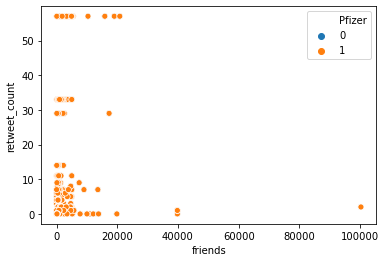

In [76]:
sns.scatterplot(data=vaccines, x="friends", y="retweet_count", hue="Pfizer")

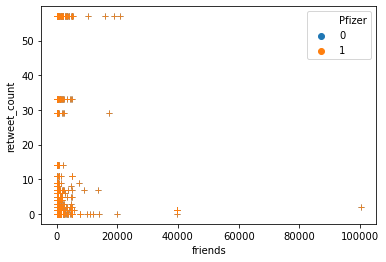

In [77]:
sns.scatterplot(data=vaccines, x="friends", y="retweet_count", hue="Pfizer", marker="+")

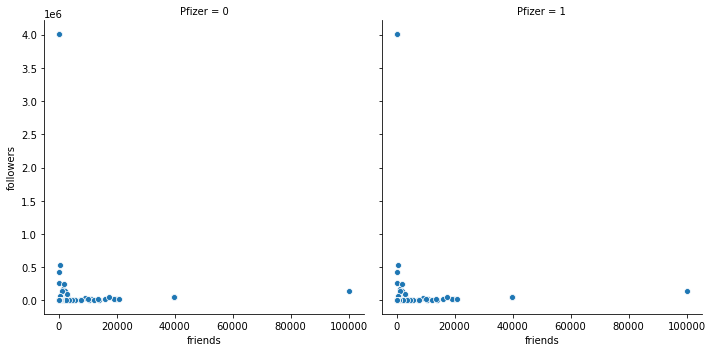

In [78]:
sns.relplot(
    data=vaccines, x="friends", y="followers",
    col="Pfizer", kind="scatter")

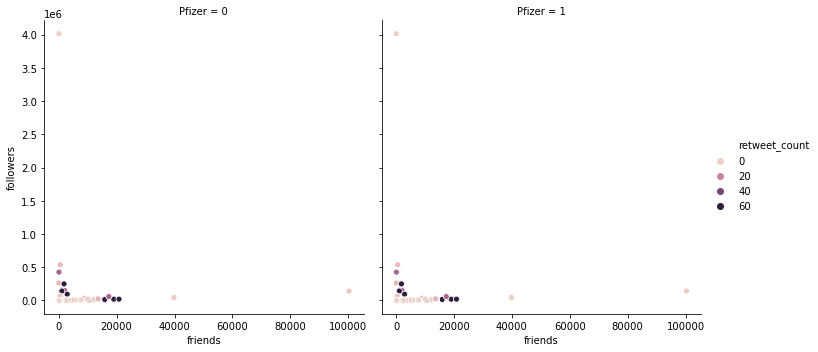

In [79]:
sns.relplot(
    data=vaccines, x="friends", y="followers",
    col="Pfizer", kind="scatter", hue="retweet_count")